
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [2]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [3]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0713 06:54:11.684061 139882640750464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 06:54:11.729056 139882640750464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 06:54:11.736771 139882640750464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [5]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [6]:
# 第三步：編譯, 

adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = adam,  loss = 'binary_crossentropy', metrics = ['accuracy'])

W0713 03:41:05.605196 139675210332032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 03:41:05.611464 139675210332032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 03:41:05.616794 139675210332032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維  
# X_train = X_train.reshape(60000, 784)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])


Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


11493376/11490434 [==============================] - 1s 0us/step


In [7]:
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

In [0]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 

batch_size = 100
epochs = 20


In [15]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
#import tensorflow as tf
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size =128,epochs=20,shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 11/20
 - 1s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 12/20
 - 1s - loss: 2.8898 - 

In [16]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8918549060821532, 0.8196000051498413]

 The accuracy of the model is 0.098000 


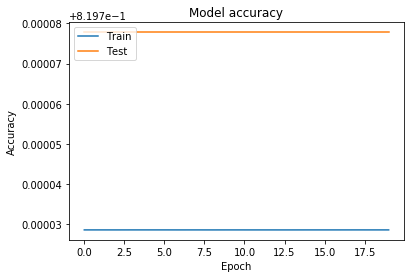

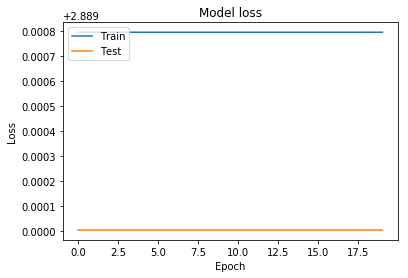

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Adam很難收斂ＯＯＯ

## optimizers = SGD

請注意ｍodel名稱一定要改成其他, 不可以沿用, 沿用結果跟原來同

In [0]:
model_sgd = Sequential()
model_sgd.add(Dense(500, input_dim=784)) #First layer要有input_dim參數, 之後就default
model_sgd.add(Activation('sigmoid'))

model_sgd.add(Dense(500))  #建Second layer
model_sgd.add(Activation('sigmoid'))

model_sgd.add(Dense(500))  #建Third layer
model_sgd.add(Activation('sigmoid'))

model_sgd.add(Dense(500))  #建forth layer
model_sgd.add(Activation('sigmoid'))

model_sgd.add(Dense(10)) #建Third layer
model_sgd.add(Activation('softmax'))



In [25]:
model_sgd.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
__________

In [0]:
#更換ＳＧＤ

model_sgd.compile(loss='binary_crossentropy', optimizer= optimizers.SGD(lr=0.1),
             metrics=['accuracy'])

In [27]:

#history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs )

model_sgd.fit(X_train, Y_train, batch_size=100, epochs=20)


Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3247 - acc: 0.9000
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3227 - acc: 0.9000
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3198 - acc: 0.9000
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3141 - acc: 0.9000
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.2988 - acc: 0.9000
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2608 - acc: 0.9071
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2146 - acc: 0.9144
Epoch 8/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1750 - acc: 0.9270
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1387 - acc: 0.9457
Epoch 10/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1104 - acc: 0.9622

In [28]:
print ( " test set " )
scores = model_sgd.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model_sgd.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.04318155623972416, 0.9869500112533569]

 The accuracy of the model is 0.932200 


## optimizers = Rmsprop　

效果：Rmsprop > SGD > Adam

請注意ｍodel名稱一定要改成其他, 不可以沿用, 沿用結果跟原來同


In [0]:
def c_model(i, input_d):
  model =  Sequential()
  input_layer = [Dense(i, input_dim=input_d), 
               Activation('sigmoid')]

  fir_layer = [Dense(i), 
                Activation('sigmoid')]
  
  sec_layer = [Dense(i), 
                Activation('sigmoid')]

  output_layer = [Dense(10), 
               Activation('softmax')]
  
  layers = input_layer + fir_layer + sec_layer + output_layer
  
  return Sequential(layers)
  
  

In [0]:
model_r = c_model(500,X_train.shape[1] ) 

In [13]:
model_r.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
__________

In [14]:
#更換RMSprop

model_r.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             metrics=['accuracy'])

W0713 06:56:25.521499 139882640750464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 06:56:25.531364 139882640750464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 06:56:25.538551 139882640750464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:

#history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs )

history = model_r.fit(X_train,Y_train,batch_size =128,epochs=20,shuffle=True,verbose=2,validation_split=0.3 )


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0097 - val_acc: 0.9968
Epoch 2/20
 - 2s - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0122 - val_acc: 0.9960
Epoch 3/20
 - 2s - loss: 0.0071 - acc: 0.9975 - val_loss: 0.0135 - val_acc: 0.9957
Epoch 4/20
 - 2s - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0113 - val_acc: 0.9967
Epoch 5/20
 - 2s - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0116 - val_acc: 0.9964
Epoch 6/20
 - 2s - loss: 0.0060 - acc: 0.9979 - val_loss: 0.0123 - val_acc: 0.9962
Epoch 7/20
 - 2s - loss: 0.0054 - acc: 0.9982 - val_loss: 0.0112 - val_acc: 0.9967
Epoch 8/20
 - 2s - loss: 0.0055 - acc: 0.9982 - val_loss: 0.0117 - val_acc: 0.9965
Epoch 9/20
 - 2s - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0137 - val_acc: 0.9960
Epoch 10/20
 - 2s - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0135 - val_acc: 0.9961
Epoch 11/20
 - 2s - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0140 - val_acc: 0.9961
Epoch 12/20
 - 2s - loss: 0.0046 - 

In [18]:
print ( " test set " )
scores = model_ｒ.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model_ｒ.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.017203684522100957, 0.9956800174713135]

 The accuracy of the model is 0.978300 


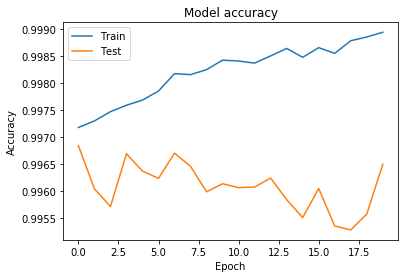

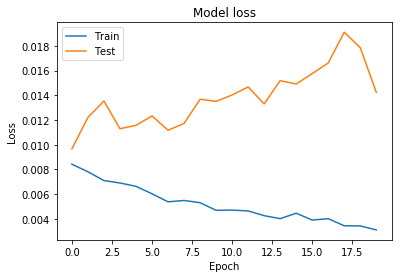

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()